# Exploratory Data Analysis – Coffee Database

En este notebook exploraremos el dataset `coffee_db.parquet` para entender:

1. Tendencia global del consumo de café (1990–2019).  
2. Evolución de los 10 países principales.  
3. Distribución por tipo de café.  
4. Países con mayor tasa de crecimiento (CAGR).  

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patheffects as pe  # para borde negro en textos

# Estilo global
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams.update({
    "figure.figsize": (22, 9),
    "figure.dpi": 140,          # más nitidez
    "axes.titlesize": 20,
    "axes.labelsize": 14,
    "axes.grid": True,
    "grid.alpha": 0.25
})

def fmt_millions(n: float) -> str:
    """Formato latino: M (10^6), MM (10^9), B (10^12)."""
    if pd.isna(n): 
        return ""
    if abs(n) >= 1e12:
        return f"{n/1e12:.1f}B"
    elif abs(n) >= 1e9:
        return f"{n/1e9:.1f}mM"
    else:
        return f"{n/1e6:.0f}M"

def text_label(ax, x, y, s, fontsize=10, offset=0.0):
    """Etiqueta legible con fondo blanco y borde negro fino."""
    txt = ax.text(
        x, y + offset, s,
        ha="center", va="bottom", fontsize=fontsize, color="black",
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.9)
    )
    # Borde negro sutil
    txt.set_path_effects([pe.Stroke(linewidth=1.5, foreground="black"), pe.Normal()])
    return txt



## 1. Carga y transformación de datos

Leemos **`coffee_db.parquet`** y lo pasamos de formato ancho (`1990/91, 1991/92,...`) a largo.

In [55]:
# Leer directamente coffee_db.parquet
df = pd.read_parquet("coffee_db.parquet")

# Transformar a formato largo
fixed = ["Country", "Coffee type", "Total_domestic_consumption"]
year_cols = [c for c in df.columns if "/" in c]

df_long = df.melt(id_vars=fixed, value_vars=year_cols,
                  var_name="Year", value_name="Consumption")
df_long["Year"] = df_long["Year"].str.split("/").str[0].astype(int)
df_long.rename(columns={
    "Country":"Pais", "Coffee type":"Tipo_Cafe",
    "Total_domestic_consumption":"Consumo_Total_Original"
}, inplace=True)
df_long = df_long.sort_values(["Pais","Tipo_Cafe","Year"]).reset_index(drop=True)

df_long.head()


,Pais,Tipo_Cafe,Consumo_Total_Original,Year,Consumption
0,Angola,Robusta/Arabica,46500000,1990,1200000
1,Angola,Robusta/Arabica,46500000,1991,1800000
2,Angola,Robusta/Arabica,46500000,1992,2100000
3,Angola,Robusta/Arabica,46500000,1993,1200000
4,Angola,Robusta/Arabica,46500000,1994,1500000


In [63]:
df.head()

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000


In [76]:
df.columns

Index(['Country', 'Coffee type', '1990/91', '1991/92', '1992/93', '1993/94',
       '1994/95', '1995/96', '1996/97', '1997/98', '1998/99', '1999/00',
       '2000/01', '2001/02', '2002/03', '2003/04', '2004/05', '2005/06',
       '2006/07', '2007/08', '2008/09', '2009/10', '2010/11', '2011/12',
       '2012/13', '2013/14', '2014/15', '2015/16', '2016/17', '2017/18',
       '2018/19', '2019/20', 'Total_domestic_consumption'],
      dtype='object')

In [67]:
df['Country'].unique()

array(['Angola', 'Bolivia (Plurinational State of)', 'Brazil', 'Burundi',
       'Ecuador', 'Indonesia', 'Madagascar', 'Malawi', 'Papua New Guinea',
       'Paraguay', 'Peru', 'Rwanda', 'Timor-Leste', 'Zimbabwe', 'Congo',
       'Cuba', 'Dominican Republic', 'Haiti', 'Philippines', 'Tanzania',
       'Zambia', 'Cameroon', 'Central African Republic', 'Colombia',
       'Costa Rica', "Côte d'Ivoire", 'Democratic Republic of Congo',
       'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Ghana',
       'Guatemala', 'Guinea', 'Guyana', 'Honduras', 'India', 'Jamaica',
       'Kenya', "Lao People's Democratic Republic", 'Liberia', 'Mexico',
       'Nepal', 'Nicaragua', 'Nigeria', 'Panama', 'Sierra Leone',
       'Sri Lanka', 'Thailand', 'Togo', 'Trinidad & Tobago', 'Uganda',
       'Venezuela', 'Viet Nam', 'Yemen'], dtype=object)

In [66]:
df['Coffee type'].unique()

array(['Robusta/Arabica', 'Arabica', 'Arabica/Robusta', 'Robusta'],
      dtype=object)

## 2. Funciones auxiliares para gráficos

Para mantener el código limpio, definimos helpers que agregan etiquetas automáticamente.


In [56]:
def label_line_last(ax, x_last, y_last, text:str):
    ax.text(x_last, y_last, f"  {text}", va="center", ha="left",
            fontsize=10, weight="bold")

def label_line_every_k(ax, x_vals, y_vals, k:int=5, fontsize:int=9):
    for i, (xv, yv) in enumerate(zip(x_vals, y_vals)):
        if i % k == 0:
            ax.text(xv, yv, fmt_millions(yv), ha="center", va="bottom", fontsize=fontsize)

def label_bars(ax, fontsize:int=10, offset:int=5):
    for p in ax.patches:
        y = p.get_height()
        if pd.isna(y): continue
        x = p.get_x() + p.get_width()/2
        ax.annotate(fmt_millions(y), (x, y), ha="center", va="bottom",
                    xytext=(0, offset), textcoords="offset points",
                    fontsize=fontsize, weight="bold")


## 3. Tendencia global del consumo de café


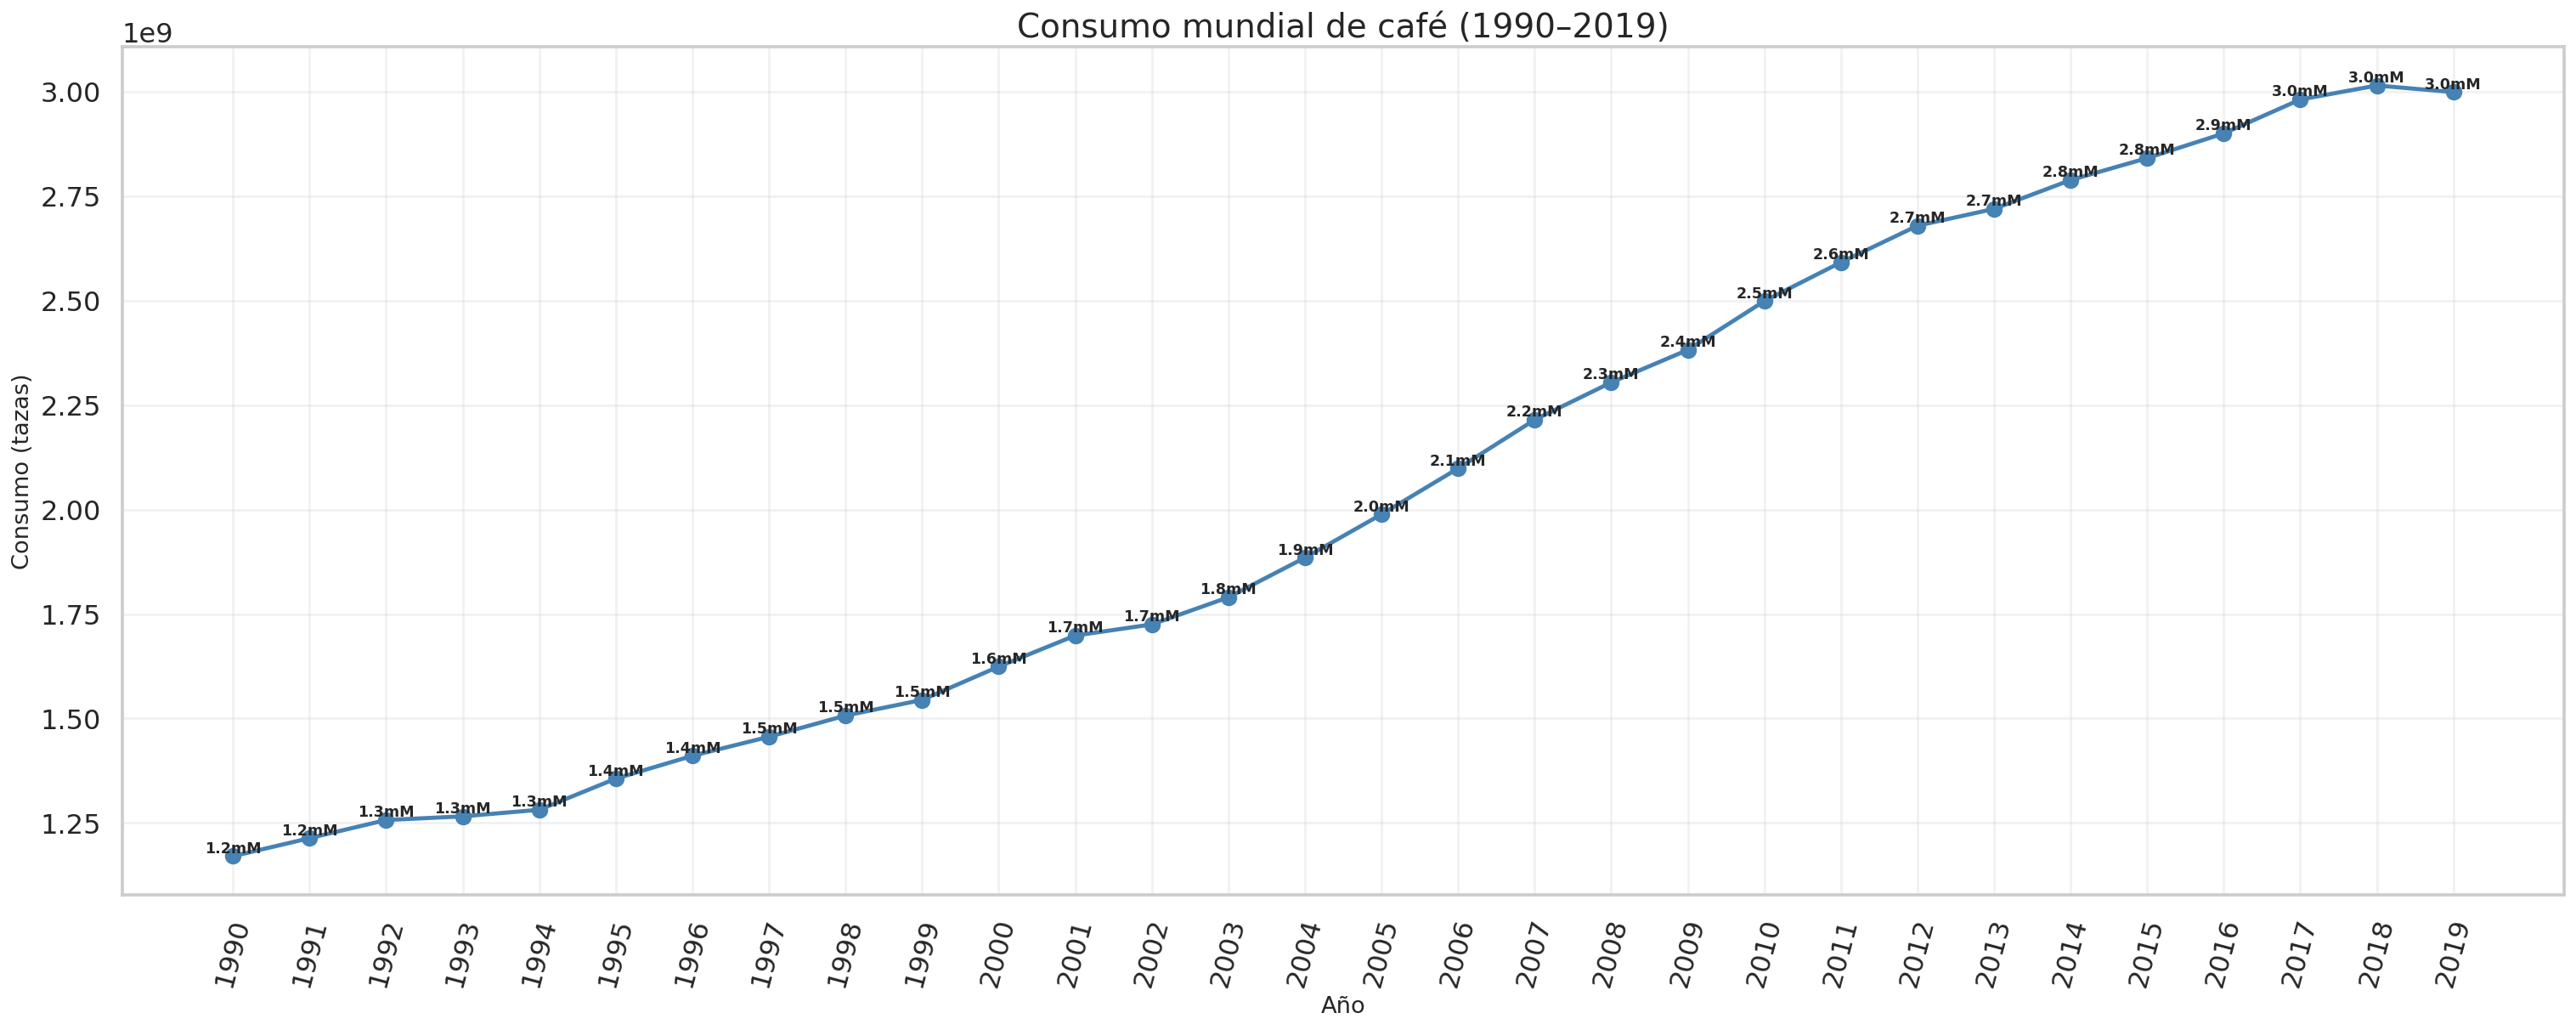

In [57]:
# === Celda 3: Tendencia global del consumo de café (con etiquetas en cada punto) ===
global_ts = df_long.groupby("Year", as_index=False)["Consumption"].sum()

fig, ax = plt.subplots()
ax.plot(global_ts["Year"], global_ts["Consumption"], marker="o", linewidth=2.5, color="steelblue")

ax.set_title("Consumo mundial de café (1990–2019)")
ax.set_xlabel("Año")
ax.set_ylabel("Consumo (tazas)")

# Etiquetar cada punto
for i, row in global_ts.iterrows():
    ax.text(row["Year"], row["Consumption"], fmt_millions(row["Consumption"]),
            ha="center", va="bottom", fontsize=9, weight="bold")

# Mostrar todos los años en el eje X
ax.set_xticks(global_ts["Year"])
ax.tick_params(axis="x", rotation=75)

plt.tight_layout()
plt.show()


## 4. Evolución del consumo en los 10 países principales


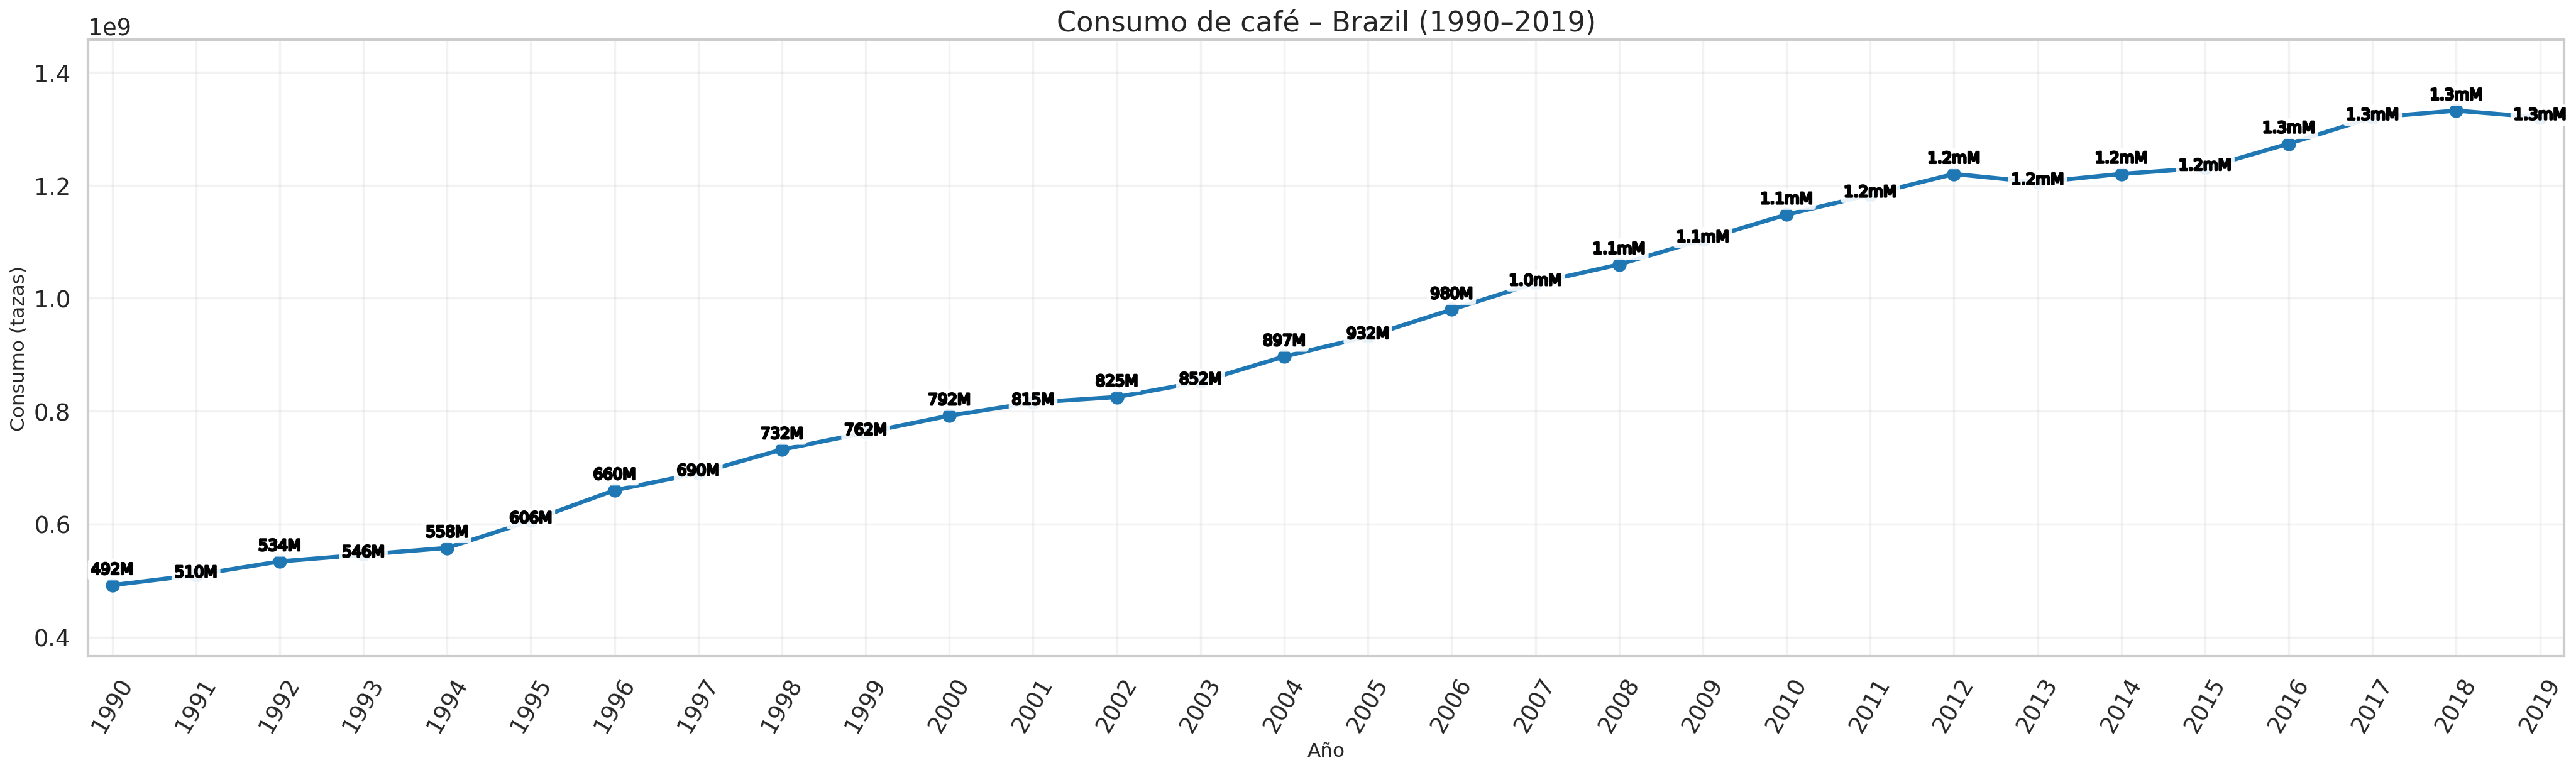

In [58]:
# === BRASIL: etiquetas en TODOS los puntos, limpio ===
br = (df_long[df_long["Pais"] == "Brazil"]
      .groupby("Year", as_index=False)["Consumption"].sum())

fig, ax = plt.subplots(figsize=(26, 8), dpi=160)
ax.plot(br["Year"], br["Consumption"], marker="o", linewidth=3, color="#1f77b4", zorder=2)

ax.set_title("Consumo de café – Brazil (1990–2019)")
ax.set_xlabel("Año"); ax.set_ylabel("Consumo (tazas)")
ax.set_xticks(br["Year"]); ax.tick_params(axis="x", rotation=60)

# Etiquetas en cada punto con fondo blanco y borde (muy legible)
ymin, ymax = ax.get_ylim(); yrange = ymax - ymin
for i, (xv, yv) in enumerate(zip(br["Year"], br["Consumption"])):
    off = (0.015 if (i % 2 == 0) else -0.010) * yrange
    text_label(ax, xv, yv, fmt_millions(yv), fontsize=11, offset=off)

ax.margins(x=0.01, y=0.15)
plt.tight_layout()
plt.show()


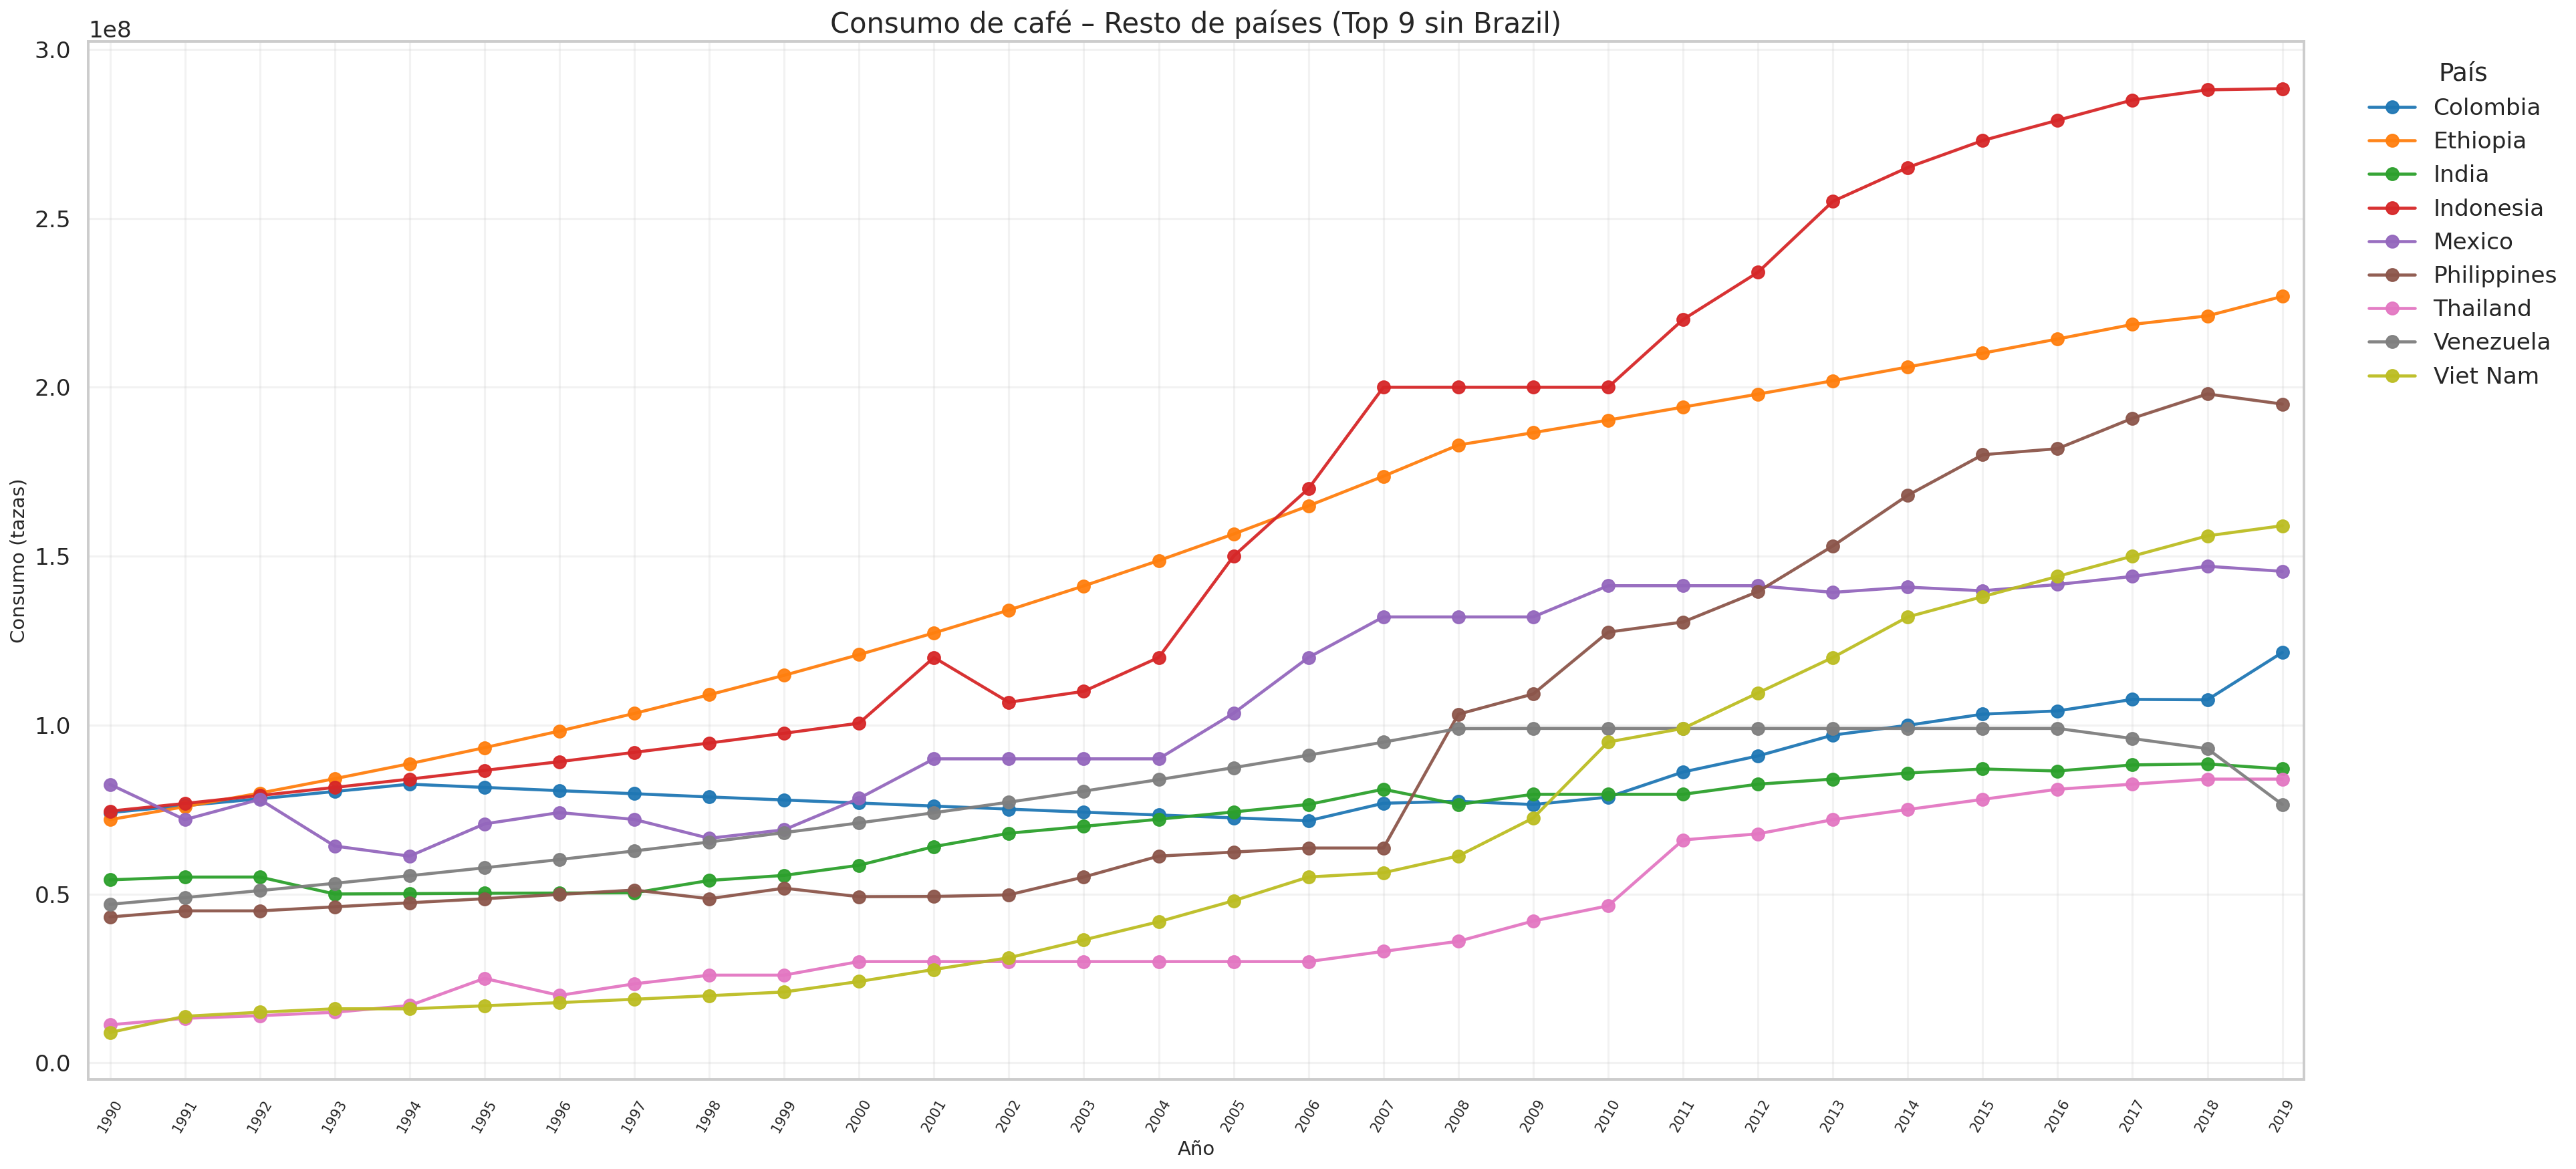

In [59]:
# === RESTO DE PAÍSES (Top 9 sin Brazil, SIN etiquetas de datos) ===
otros = df_long[df_long["Pais"] != "Brazil"].copy()
top9 = (otros.groupby("Pais")["Consumption"]
        .sum().sort_values(ascending=False).head(9).index)
df_otros = otros[otros["Pais"].isin(top9)]

fig, ax = plt.subplots(figsize=(26, 12), dpi=150)

palette = sns.color_palette("tab10", n_colors=len(top9))
for (pais, sub), color in zip(df_otros.groupby("Pais"), palette):
    sub = sub.sort_values("Year").reset_index(drop=True)
    ax.plot(sub["Year"], sub["Consumption"], marker="o", linewidth=2.2,
            color=color, alpha=0.95, label=pais)

ax.set_title("Consumo de café – Resto de países (Top 9 sin Brazil)")
ax.set_xlabel("Año"); ax.set_ylabel("Consumo (tazas)")

# Todos los años en eje X
years_sorted = sorted(df_otros["Year"].unique())
ax.set_xticks(years_sorted)
ax.tick_params(axis="x", rotation=60, labelsize=10)

# Leyenda externa clara
ax.legend(title="País", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

ax.margins(x=0.01, y=0.05)
plt.tight_layout()
plt.show()



## 5. Consumo acumulado global por tipo de café


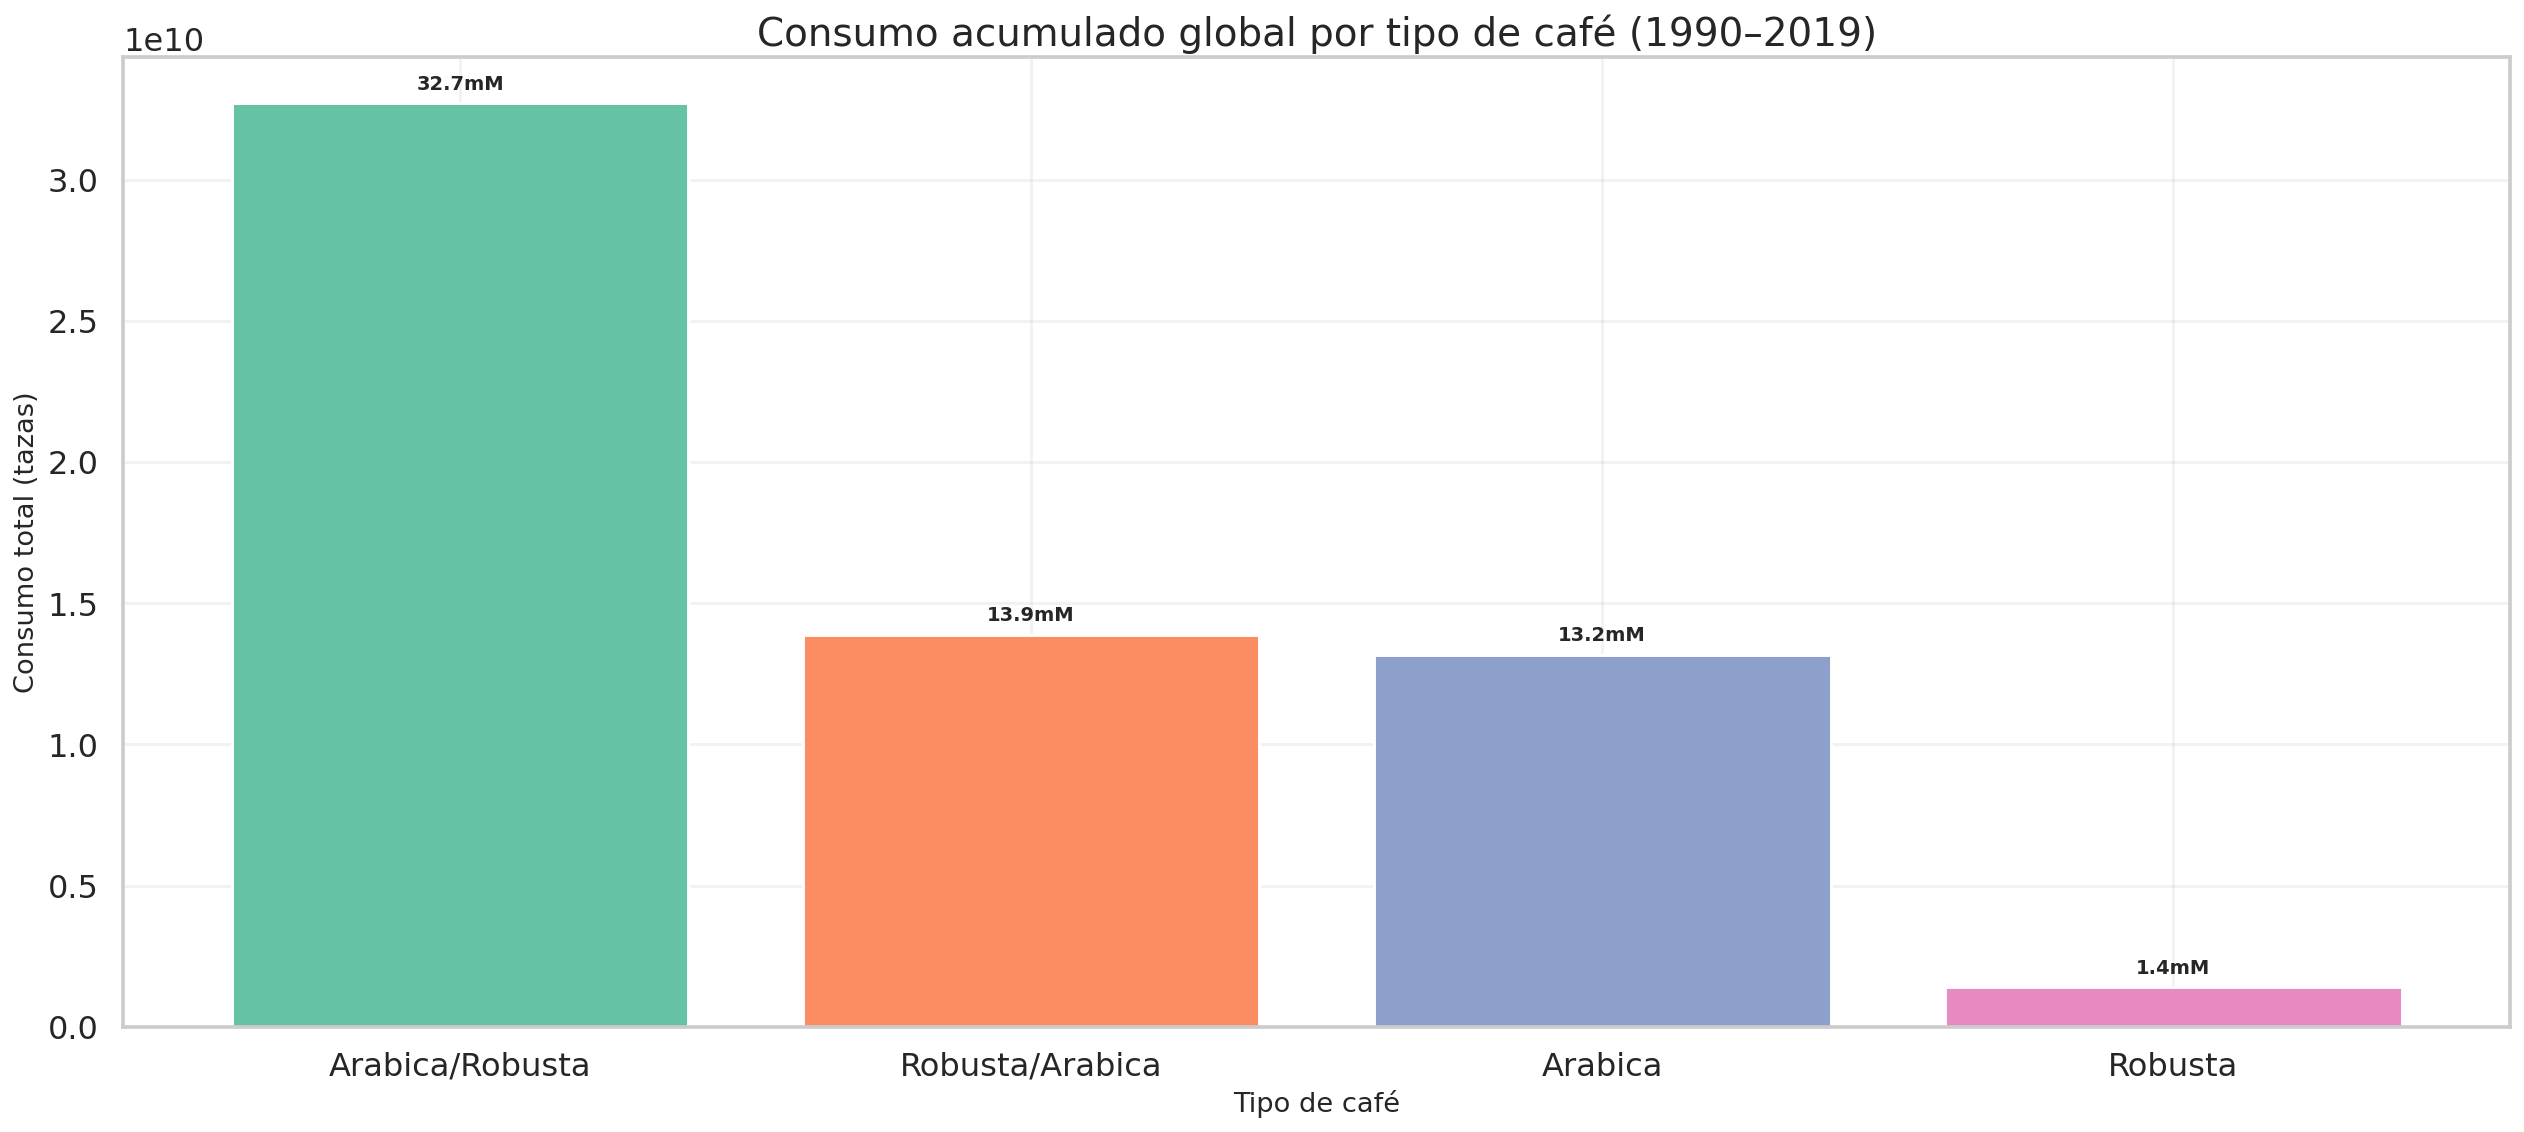

In [60]:
by_type = (df_long.groupby("Tipo_Cafe", as_index=False)["Consumption"]
           .sum().sort_values("Consumption", ascending=False))

fig, ax = plt.subplots()
ax.bar(by_type["Tipo_Cafe"], by_type["Consumption"], color=sns.color_palette("Set2", n_colors=len(by_type)))
ax.set_title("Consumo acumulado global por tipo de café (1990–2019)")
ax.set_xlabel("Tipo de café"); ax.set_ylabel("Consumo total (tazas)")
label_bars(ax)
plt.show()


## 6. Países con mayor CAGR (tasa de crecimiento anual compuesto)


In [61]:
def compute_cagr(df_long, min_years:int=15):
    g = (df_long.sort_values("Year")
         .groupby("Pais")
         .agg(start_year=("Year","min"),
              end_year=("Year","max"),
              start_val=("Consumption","first"),
              end_val=("Consumption","last"))
         .reset_index())
    g = g[g["start_val"] > 0]
    g["years"] = g["end_year"] - g["start_year"]
    g = g[g["years"] >= min_years]
    g["CAGR"] = (g["end_val"] / g["start_val"])**(1/g["years"]) - 1
    return g.sort_values("CAGR", ascending=False)

cagr_df = compute_cagr(df_long, min_years=15).head(10)

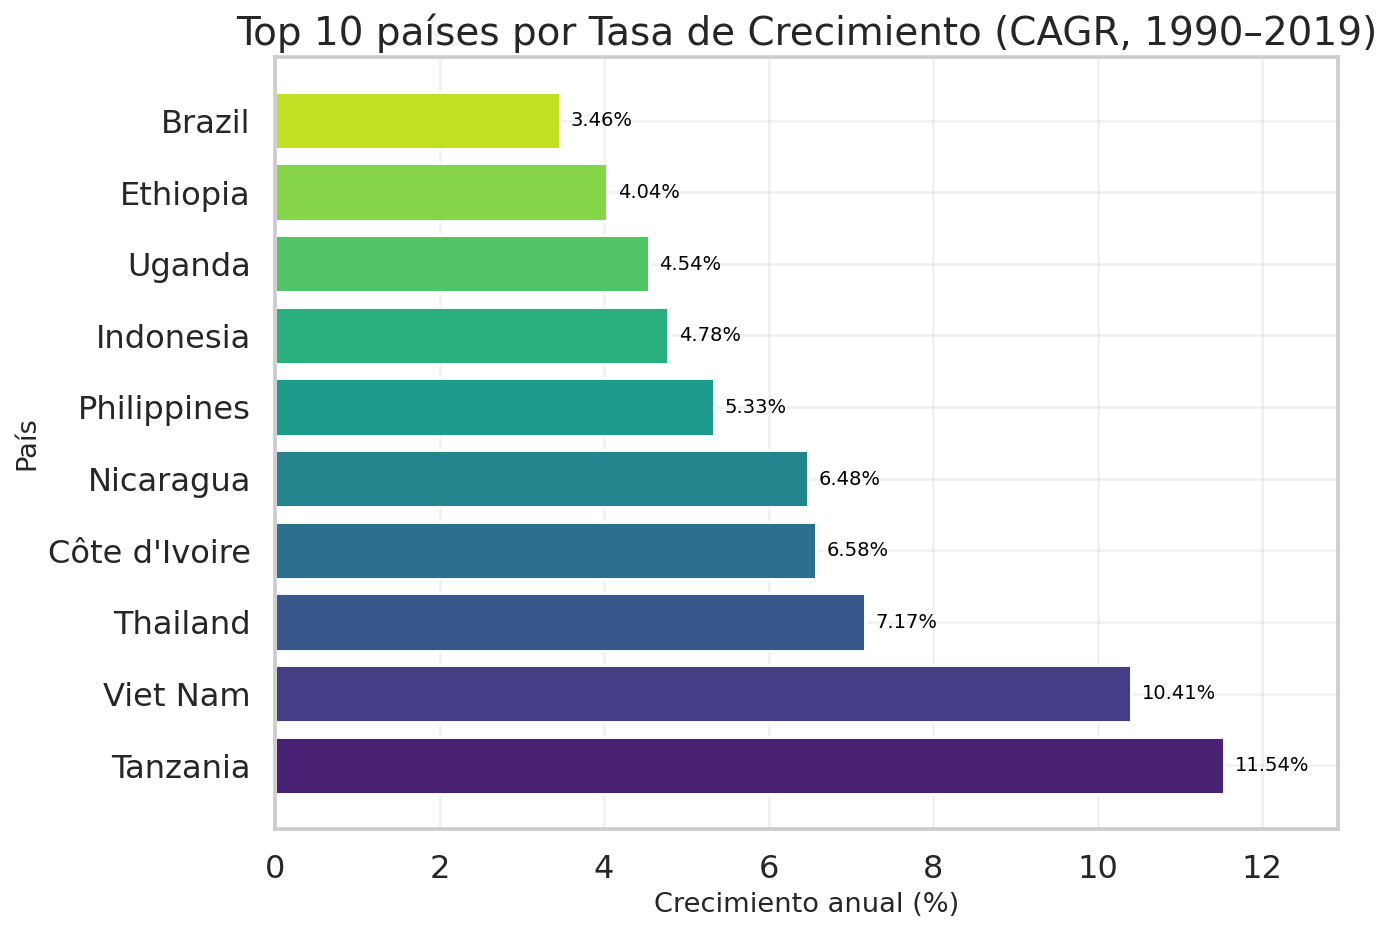

In [ ]:
# cagr_df ya calculado; valores en porcentaje:
vals = (cagr_df["CAGR"] * 100).to_numpy()

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.barh(cagr_df["Pais"], vals, color=sns.color_palette("viridis", len(vals)))

ax.set_title("Top 10 países por Tasa de Crecimiento (CAGR, 1990–2019)")
ax.set_xlabel("Crecimiento anual (%)"); ax.set_ylabel("País")

# Asegura espacio a la derecha para la etiqueta
maxv = vals.max()
ax.set_xlim(0, maxv * 1.12)  # 12% extra

# Padding proporcional al rango del eje
xpad = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.01

# Etiquetas usando la geometría real de cada barra
for bar, v in zip(bars, vals):
    w = bar.get_width()              # largo de la barra
    y = bar.get_y() + bar.get_height()/2  # centro vertical de la barra
    ax.text(w + xpad, y, f"{v:.2f}%", va="center", ha="left", fontsize=10, color="black")

plt.tight_layout()
plt.show()

In [72]:
#!pip install yfinance pandas_datareader

In [73]:
#!pip install yfinance

# Extraer lo datos del precio del café

In [ ]:
import yfinance as yf

coffee = yf.download("KC=F", start="1990-01-01", end="2020-12-31", interval="1mo")
print(coffee.head())


/tmp/ipykernel_60722/2015794904.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  coffee = yf.download("KC=F", start="1990-01-01", end="2020-12-31", interval="1mo")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open  Volume
Ticker            KC=F        KC=F        KC=F        KC=F    KC=F
Date                                                              
2000-01-01  111.099998  126.000000  110.500000  124.000000  120093
2000-02-01   99.900002  114.500000   98.000000  110.599998   98735
2000-03-01  103.699997  109.000000  100.250000  101.250000   39103
2000-04-01   95.300003  103.699997   91.949997  103.500000   96501
2000-05-01   93.000000  104.699997   90.349998   99.000000   62559


## Paso 1: preparar precios anuales

In [83]:
# si "Close" es un DataFrame multi-columna, agarramos la primera col
close_series = coffee["Close"].iloc[:,0] if isinstance(coffee["Close"], pd.DataFrame) else coffee["Close"]

# promedio anual
price_annual = (
    close_series
    .resample("Y").mean()
    .to_frame(name="Price_USc_lb")
    .reset_index()
)

price_annual["Year"] = price_annual["Date"].dt.year
price_annual = price_annual[["Year", "Price_USc_lb"]]

print(price_annual.head())


   Year  Price_USc_lb
0  2000     87.686363
1  2001     53.270000
2  2002     52.700000
3  2003     61.504546
4  2004     79.645000


/tmp/ipykernel_60722/1484504972.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample("Y").mean()


## Paso 2: unir con consumo global

In [84]:
global_ts = df_long.groupby("Year", as_index=False)["Consumption"].sum()
cons_price = global_ts.merge(price_annual, on="Year", how="inner")

print(cons_price.head())


   Year  Consumption  Price_USc_lb
0  2000   1624089720     87.686363
1  2001   1698539400     53.270000
2  2002   1725106260     52.700000
3  2003   1789960680     61.504546
4  2004   1884790740     79.645000


/tmp/ipykernel_60722/2950755020.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  close_series.resample("Y").mean()         # promedio anual


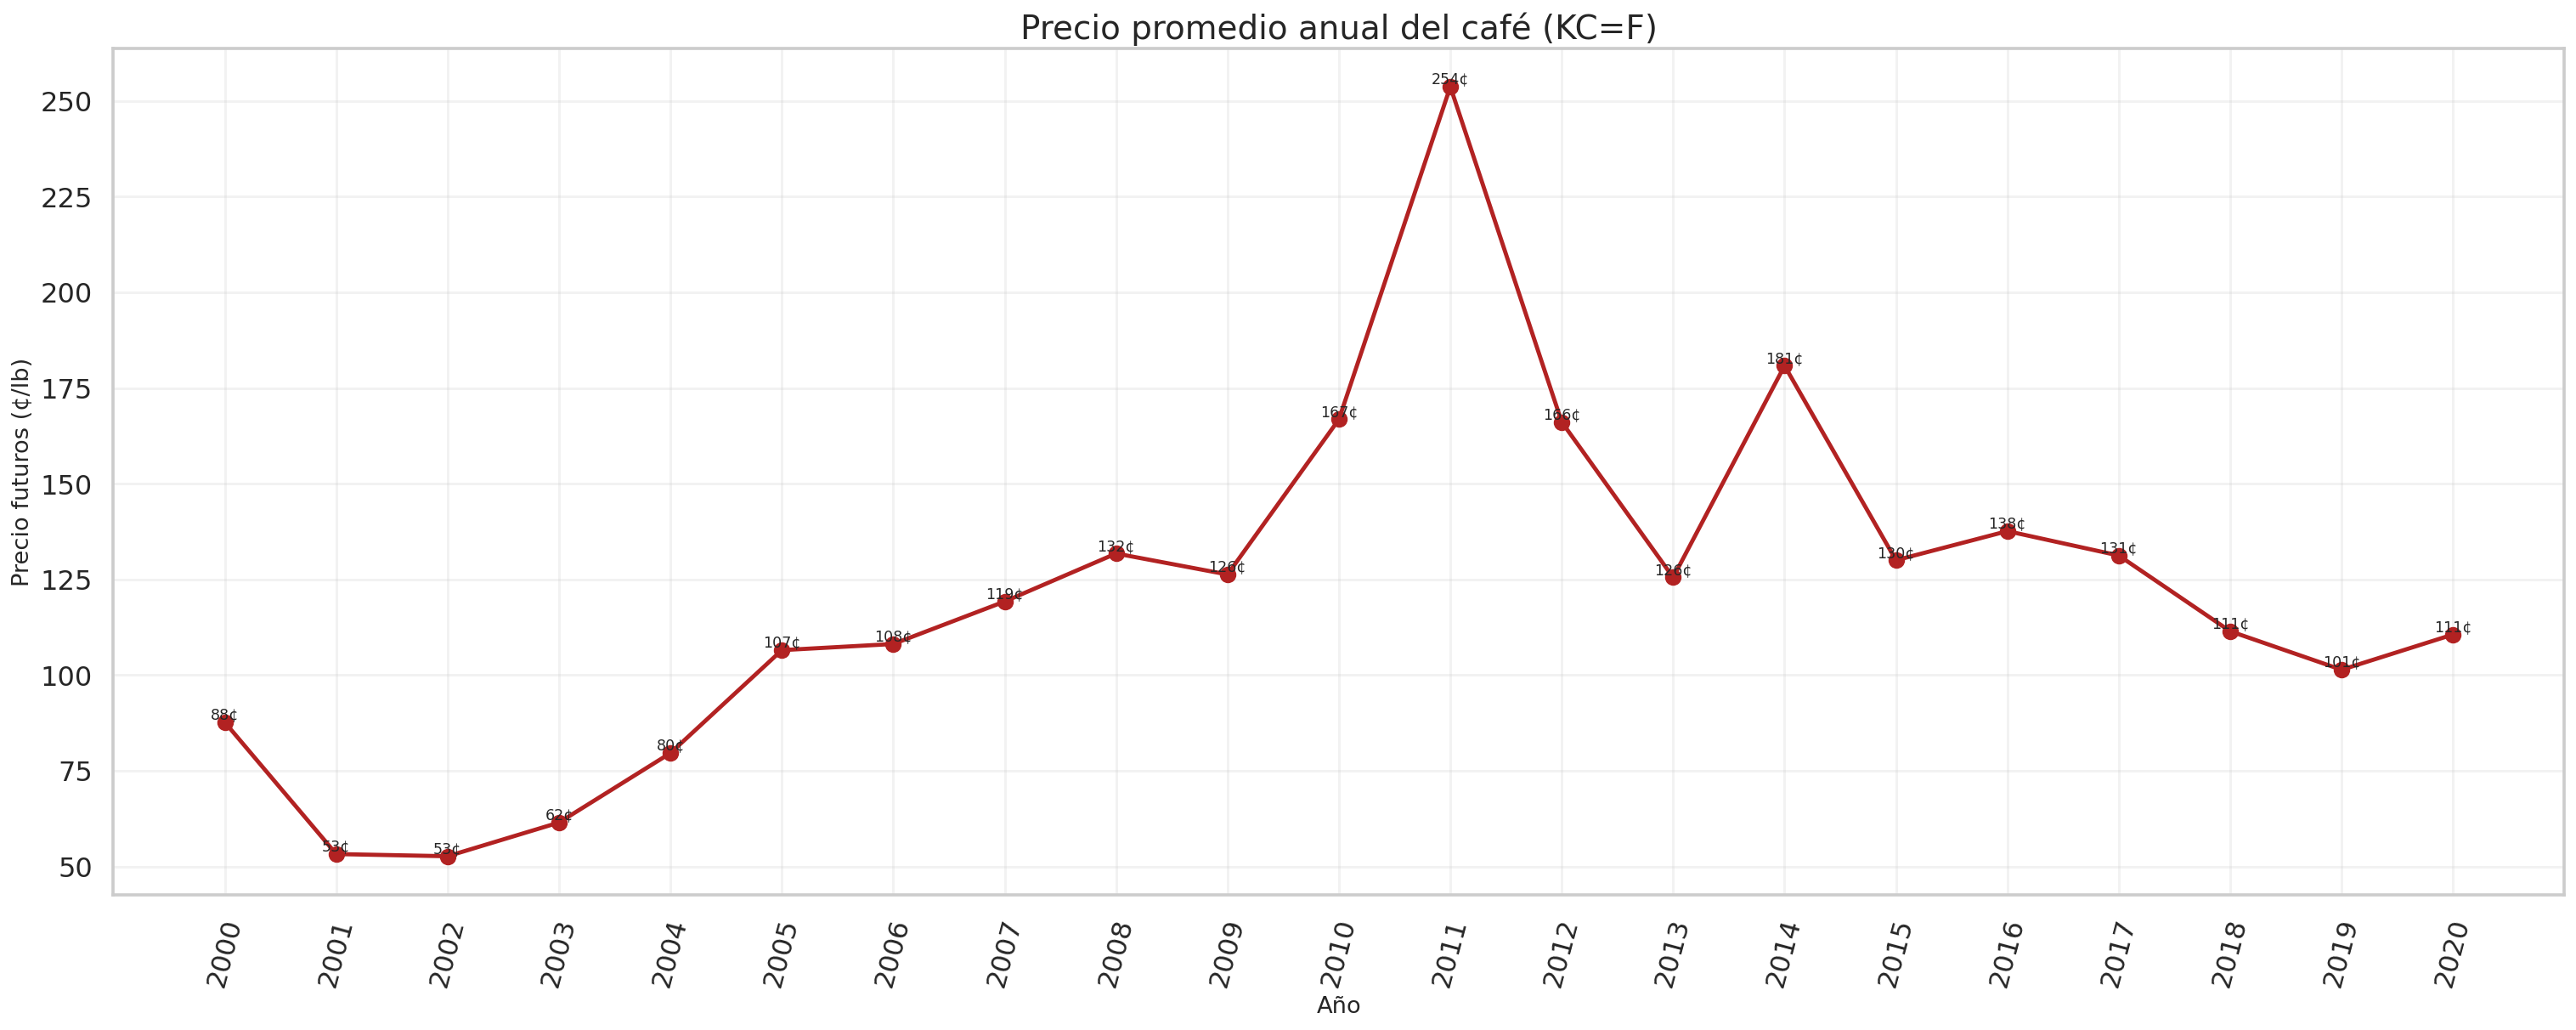

In [86]:
# === Precio promedio anual del café (KC=F) con etiquetas ===
# Toma el Close mensual y promedia por año
close_series = coffee["Close"].iloc[:, 0] if isinstance(coffee["Close"], pd.DataFrame) else coffee["Close"]

price_annual = (
    close_series.resample("Y").mean()         # promedio anual
    .to_frame(name="Price_USc_lb")            # ¢/lb
    .reset_index()
)
price_annual["Year"] = price_annual["Date"].dt.year
price_annual = price_annual[["Year", "Price_USc_lb"]]

# Plot
fig, ax = plt.subplots()
ax.plot(price_annual["Year"], price_annual["Price_USc_lb"],
        marker="o", linewidth=2.5, color="firebrick")

ax.set_title("Precio promedio anual del café (KC=F)")
ax.set_xlabel("Año")
ax.set_ylabel("Precio futuros (¢/lb)")

# Etiquetar cada punto (sin negrilla)
for _, r in price_annual.iterrows():
    ax.text(r["Year"], r["Price_USc_lb"], f"{r['Price_USc_lb']:.0f}¢",
            ha="center", va="bottom", fontsize=9)

# Mostrar todos los años en el eje X
ax.set_xticks(price_annual["Year"])
ax.tick_params(axis="x", rotation=75)

plt.tight_layout()
plt.show()
